# 1. Import Libraries

In [1]:
import pandas
pandas.__version__ #verification of venv

'2.2.2'

In [ ]:
!pip install seaborn
!pip install statsmodels
!pip install wordcloud

In [ ]:
!pip install scikit-learn

In [8]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

from scipy import stats

# 2. Read the Training Data

In [9]:
file_path= r"C:\Users\jinni\Desktop\flights-sagemaker-project\data\train.csv"

train= pd.read_csv(file_path)

train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,11:30:00,18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,02:15:00,19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,06:30:00,16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,06:40:00,16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,14:05:00,09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,09:50:00,23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,10:20:00,12:55:00,155,0.0,No Info,4409


In [10]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [11]:
#update dtypes of a few columns- use assign()

train.assign(**{
    col:pd.to_datetime(train.loc[:,col], dayfirst=True)
    for col in ["date_of_journey", "dep_time","arrival_time" ]
})

C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4035261340.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col:pd.to_datetime(train.loc[:,col], dayfirst=True)
C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4035261340.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col], dayfirst=True)
C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4035261340.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col], dayfirst=True)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-03 11:30:00,2024-07-03 18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-03 02:15:00,2024-07-03 19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-03 08:25:00,2024-07-03 22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-07-03 06:30:00,2024-07-03 16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,2024-07-03 06:40:00,2024-07-03 16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-07-03 09:25:00,2024-07-03 18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-03 14:05:00,2024-07-03 09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,2024-07-03 09:50:00,2024-07-03 23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-07-03 10:20:00,2024-07-03 12:55:00,155,0.0,No Info,4409


In [12]:
train= train.assign(** {
    col: pd.to_datetime(train.loc[:, col], dayfirst=True)
    for col in ["date_of_journey", "dep_time","arrival_time" ]
})

train

C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4211420716.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col: pd.to_datetime(train.loc[:, col], dayfirst=True)
C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4211420716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst=True)
C:\Users\jinni\AppData\Local\Temp\ipykernel_17620\4211420716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col: pd.to_datetime(train.loc[:, col], dayfirst=True)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-03 11:30:00,2024-07-03 18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-03 02:15:00,2024-07-03 19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-03 08:25:00,2024-07-03 22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-07-03 06:30:00,2024-07-03 16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,2024-07-03 06:40:00,2024-07-03 16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-07-03 09:25:00,2024-07-03 18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-03 14:05:00,2024-07-03 09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,2024-07-03 09:50:00,2024-07-03 23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-07-03 10:20:00,2024-07-03 12:55:00,155,0.0,No Info,4409


In [13]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High Level Summary of Data

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [15]:
train.describe() # 2 numerical columns
#observe that duration has extreme values (80-2295)
# better to analyse total_stops as a categorical variable


,date_of_journey,dep_time,arrival_time,duration,total_stops,price
count,640,640,640,640.000000,640.000000,640.00000
mean,2019-05-02 09:11:15,2024-07-03 12:50:57.656249856,2024-07-03 14:07:40.781250048,598.718750,0.768750,8907.75625
min,2019-03-01 00:00:00,2024-07-03 00:30:00,2024-07-03 00:05:00,80.000000,0.000000,1965.00000
25%,2019-03-24 00:00:00,2024-07-03 08:00:00,2024-07-03 09:20:00,170.000000,0.000000,5072.00000
50%,2019-05-12 00:00:00,2024-07-03 12:00:00,2024-07-03 15:15:00,495.000000,1.000000,8056.50000
75%,2019-06-06 00:00:00,2024-07-03 17:30:00,2024-07-03 19:15:00,845.000000,1.000000,11827.25000
max,2019-06-27 00:00:00,2024-07-03 23:55:00,2024-07-03 23:55:00,2295.000000,3.000000,54826.00000
std,NaN,NaN,NaN,486.524192,0.649756,4721.01835


In [16]:
train.describe(include='O') #for categorical vars (dtypes= object)

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,205,258,258,492


In [17]:
# change dtype of total_tops to categorical
( 
    train
    .assign(total_stops= train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,205,258,258,342.0,492


## 4. High Level Analysis of Missing Values

In [18]:
eda_helper_functions.missing_info(train) #none here

,count,percentage
variable,,


- missingno library in python can also be used
- https://github.com/ResidentMario/missingno

## 5. High Level Analysis of Ouliers
* Isolation Forest Algorithm

In [19]:
forest= IsolationForest(n_estimators=10, random_state=42)

In [20]:
( 
    train
    .assign(outlier= forest.fit_predict(train
                                        .drop(columns="price")
                                        .select_dtypes(include="number")))
)

#creating new column "oulier", using IsolationForest
#drop target var "price", perform only on numeric dtypes

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-03 11:30:00,2024-07-03 18:50:00,440,1.0,No Info,12242,1
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-03 02:15:00,2024-07-03 19:00:00,1005,1.0,No Info,14714,-1
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-03 08:25:00,2024-07-03 22:35:00,850,1.0,In-flight meal not included,10844,1
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-07-03 06:30:00,2024-07-03 16:20:00,590,1.0,In-flight meal not included,8586,1
4,Indigo,2019-03-27,Delhi,Cochin,2024-07-03 06:40:00,2024-07-03 16:10:00,570,1.0,No Info,6442,1
...,...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-07-03 09:25:00,2024-07-03 18:30:00,545,1.0,No Info,8891,1
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-03 14:05:00,2024-07-03 09:30:00,1165,1.0,No Info,17261,-1
637,Air India,2019-05-18,Kolkata,Banglore,2024-07-03 09:50:00,2024-07-03 23:15:00,805,2.0,No Info,15957,-1
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-07-03 10:20:00,2024-07-03 12:55:00,155,0.0,No Info,4409,1


In [21]:
#filter out outliers using query

(
    train
    .assign(outlier= forest.fit_predict(train
                                       .drop(columns= "price")
                                       .select_dtypes(include="number")))
.query("outlier ==-1") #get all outliers
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-03 02:15:00,2024-07-03 19:00:00,1005,1.0,No Info,14714,-1
5,Jet Airways,2019-06-24,Mumbai,Hyderabad,2024-07-03 02:55:00,2024-07-03 04:20:00,85,0.0,No Info,5678,-1
6,Spicejet,2019-03-01,Mumbai,Hyderabad,2024-07-03 05:45:00,2024-07-03 07:05:00,80,0.0,No Info,12475,-1
12,Air India,2019-03-09,Delhi,Cochin,2024-07-03 06:10:00,2024-07-03 23:00:00,1010,1.0,No Info,9064,-1
13,Jet Airways,2019-06-12,Delhi,Cochin,2024-07-03 09:40:00,2024-07-03 19:00:00,560,2.0,In-flight meal not included,10368,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Vistara,2019-05-06,Kolkata,Banglore,2024-07-03 07:10:00,2024-07-03 22:40:00,930,1.0,No Info,8452,-1
629,Indigo,2019-05-24,Kolkata,Banglore,2024-07-03 19:20:00,2024-07-03 23:45:00,265,1.0,No Info,3809,-1
633,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-03 23:05:00,2024-07-03 04:25:00,1760,2.0,No Info,15129,-1
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-03 14:05:00,2024-07-03 09:30:00,1165,1.0,No Info,17261,-1


In [22]:
# to further analyse them
(
    train
    .assign(outlier= forest.fit_predict(train
                                       .drop(columns= "price")
                                       .select_dtypes(include="number")))
.query("outlier ==-1") 
.duration
.describe() #verify if genuine outliers or not
)


count     267.000000
mean      843.127341
std       619.575751
min        80.000000
25%       180.000000
50%       930.000000
75%      1400.000000
max      2295.000000
Name: duration, dtype: float64

## 6. Pair Plots
* Made for all numeric vars (each combination of them)
* We have total_stops, duration, and price

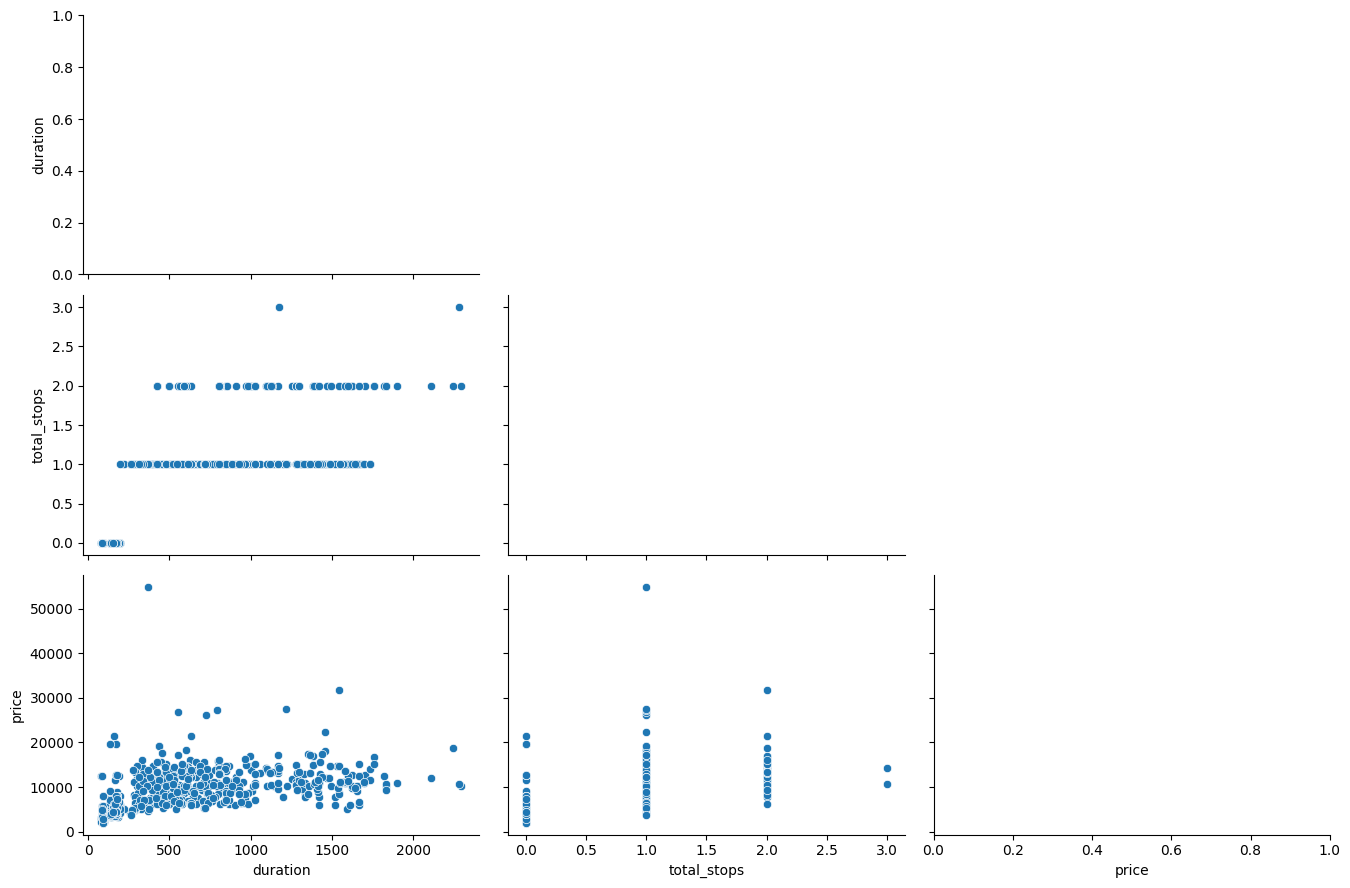

In [23]:
eda_helper_functions.pair_plots(train)

### 6.1 Observations from Pair Plots
* Bottom left- duration v/s price- somewhat linear relation- as duration increases/ the longer the flights- the more expensive the tickets are.

* Bottom right- total stops v/s price- almost same price for the stops- can't draw major conclusions.

* Top left- duration v/s total_stops- flights with 0 stops are of less duration and with 2 stops are of more duration

## 7. Correlation Analysis

* should not be multi-collinear.

In [28]:
train.corr(method="spearman", numeric_only= True)

,duration,total_stops,price
duration,1.000000,0.829324,0.682711
total_stops,0.829324,1.000000,0.699829
price,0.682711,0.699829,1.000000


In [29]:
# # correlation matrix heatmap
# #above data as a map
# def correlation_heatmap(data,
#                         figsize=(12, 6),
#                         method="spearman",
#                         cmap="RdBu"):
#   cm = data.corr(method=method) #correlation matrix

#   mask = np.zeros_like(cm, dtype=bool)
#   mask[np.triu_indices_from(mask)] = True #get indices of upper triangular values

#   fig, ax = plt.subplots(figsize=figsize)
#   hm = sns.heatmap(
#       cm,
#       vmin=-1,
#       vmax=1,
#       cmap=cmap,
#       center=0,
#       annot=True,
#       fmt=".2f",
#       linewidths=1.5,
#       square=True,
#       mask=mask, #upper half values hidden (value =True)- only lower triangle visible
#       ax=ax
#   )
#   #rotate_xlabels(ax)
#   #rotate_ylabels(ax)
#   ax.set(title=f"{method.title()} Correlation Matrix Heatmap")

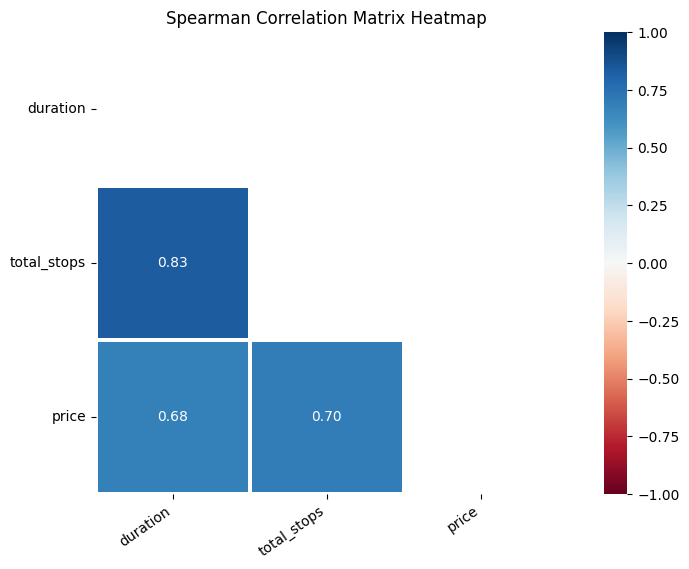

In [32]:
eda_helper_functions.correlation_heatmap(train)
#0.83 is a pretty high value of collinearity- problem for linear regression, lasso etc. Ok for trees

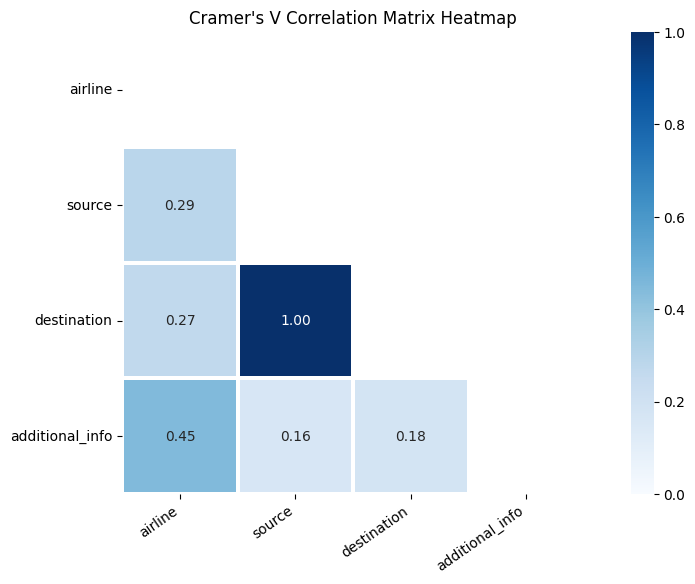

In [33]:
eda_helper_functions.cramersV_heatmap(train) #-correct helper function (as below)

## 8. Detailed Analysis of Each Feature

In [34]:
train.columns #we will analyse each column

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 Airline column

In [35]:
train.airline

0      Jet Airways
1      Jet Airways
2      Jet Airways
3      Jet Airways
4           Indigo
          ...     
635      Air India
636    Jet Airways
637      Air India
638       Air Asia
639         Indigo
Name: airline, Length: 640, dtype: object

In [36]:
# a categorical feature
train.airline.unique()

array(['Jet Airways', 'Indigo', 'Spicejet', 'Vistara', 'Air India',
       'Multiple Carriers', 'Air Asia', 'Goair', 'Trujet'], dtype=object)

In [37]:
eda_helper_functions.cat_summary(train, "airline")

0      Jet Airways
1      Jet Airways
2      Jet Airways
3      Jet Airways
4           Indigo
          ...     
635      Air India
636    Jet Airways
637      Air India
638       Air Asia
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,205


,count,percentage
category,,
Jet Airways,205,0.320312
Indigo,159,0.248438
Air India,96,0.150000
Multiple Carriers,71,0.110937
Spicejet,53,0.082812
Vistara,25,0.039062
Air Asia,22,0.034375
Goair,8,0.012500
Trujet,1,0.001563


In [38]:
#function components breakdown
train.airline.value_counts()

airline
Jet Airways          205
Indigo               159
Air India             96
Multiple Carriers     71
Spicejet              53
Vistara               25
Air Asia              22
Goair                  8
Trujet                 1
Name: count, dtype: int64

In [39]:
train.airline.value_counts(normalize=True) #gives percentage

airline
Jet Airways          0.320312
Indigo               0.248438
Air India            0.150000
Multiple Carriers    0.110937
Spicejet             0.082812
Vistara              0.039062
Air Asia             0.034375
Goair                0.012500
Trujet               0.001563
Name: proportion, dtype: float64

In [40]:
import importlib
importlib.reload(eda_helper_functions)

<module 'eda_helper_functions' from 'C:\\Users\\jinni\\Desktop\\flights-sagemaker-project\\notebooks\\eda_helper_functions.py'>

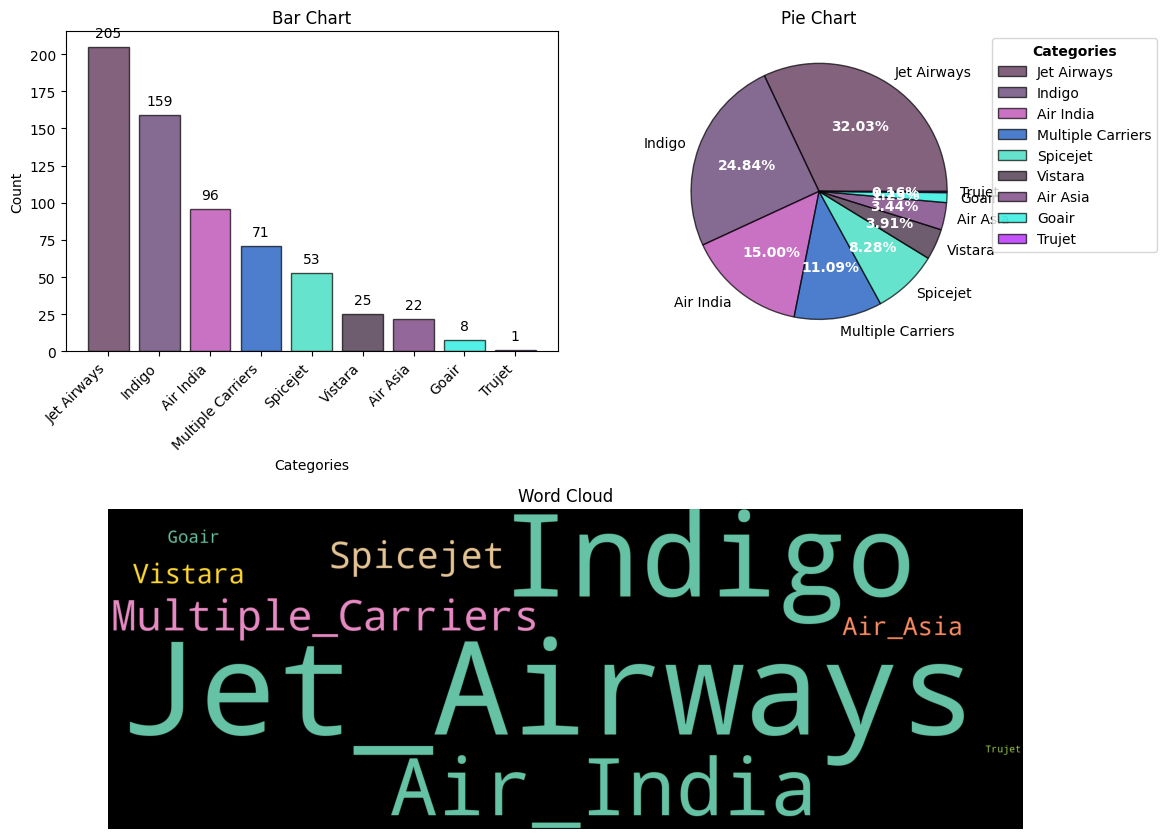

In [41]:
eda_helper_functions.cat_univar_plots(train, "airline")
#count plots

#### Technique to handle high cardinality inputs
* retain (say top 4) the most frequent categories and merge all others into one category.
* k=4 in the above helper function.

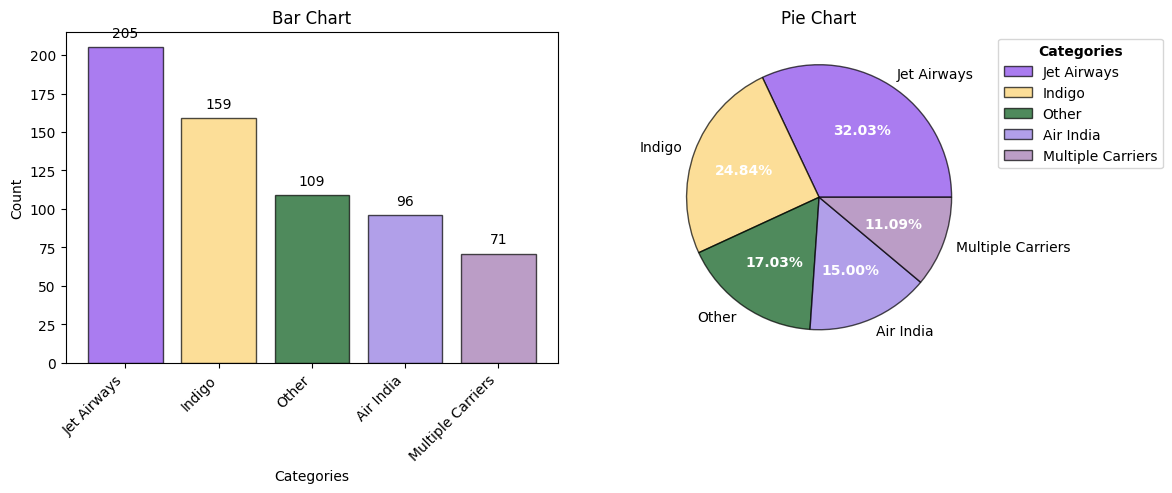

In [43]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud= False, k=4)

- Biavriate analysis of Input column and Target column (price)
- categorical and numerical vars

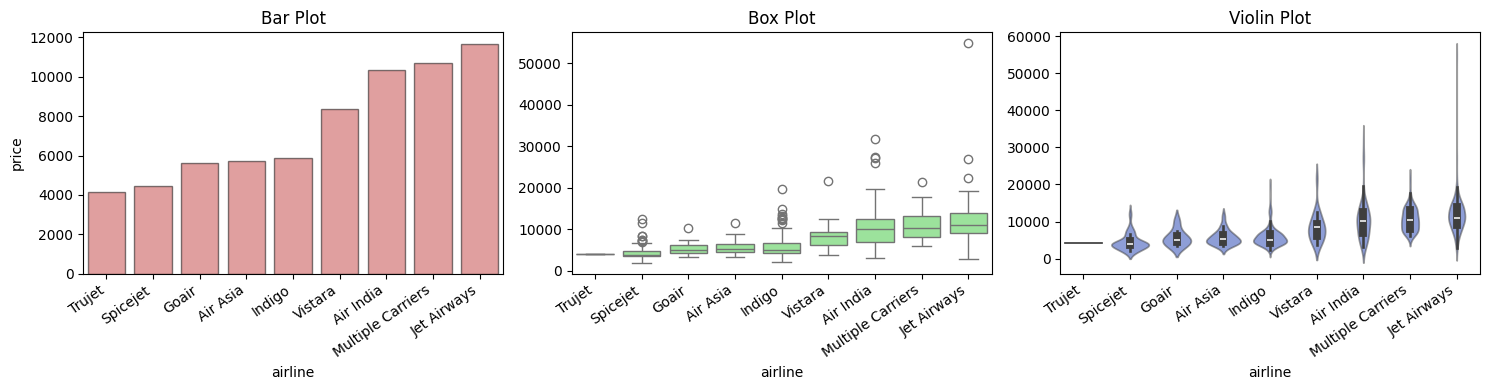

In [44]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "airline")
#shows average price for flights

## Note:
1. Observations from airline-price BAR plot (average price)-
* For different flights, average price is different.
* Airline is a good feature to predict the price.
2. Observations from airline-price BOX plot (distribution of values, percentiles (25, 75), median, end points)-
* Potential outliers in each category.
3. Observations from airline-price VIOLIN (KDE+ box) plot (shape of the distribution and skew)
* Spicejet has right skew(max values to the left)- majority of spicejet flights are cheaper and few are expensive.
* Again, the shape for each category is different- Airline is a good indicator of price. (good feature)

* `In these graphs, a relationship between airline and prices is observed. In order to confirm this relationship (that association exists)- Hypothesis testing.`

In [45]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 40.624640200629365
- p-value              : 2.5384650311362686e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 296.1712913260921
- p-value              : 2.6880438999009238e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other
